In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
sample = pd.read_csv('schedule/compiled_sample_schedule.csv')
suggested = pd.read_csv('schedule/compiled_suggested_schedule.csv')

In [3]:
suggested


,dimension_1,dimension_2,imp_1,imp_2,imp_3,imp_4,imp_5,imp_6,imp_7,od_1,...,imp_col_2,imp_col_3,imp_col_4,imp_col_5,imp_col_6,imp_col_7,algorithm,perf_dirty,perf_1,perf_2
0,accuracy,completeness,impute_standard,impute_standard,impute_standard,impute_standard,impute_standard,impute_standard,impute_knn,IQR,...,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,DecisionTree,0.870917,0.878272,0.880308
1,accuracy,completeness,impute_median,impute_median,impute_median,impute_median,impute_median,impute_random_forest,impute_mice,IQR,...,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,LogisticRegression,0.704135,0.721778,0.708826
2,accuracy,completeness,impute_median,impute_median,impute_median,impute_median,impute_median,impute_median,impute_knn,IQR,...,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,KNN,0.811467,0.813895,0.767232
3,accuracy,completeness,impute_standard,impute_standard,impute_standard,impute_standard,impute_standard,impute_standard,impute_random_forest,IQR,...,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,RandomForest,0.886566,0.884364,0.897873
4,completeness,accuracy,impute_standard,impute_standard,impute_standard,impute_standard,impute_standard,impute_standard,impute_standard,IQR,...,RAM,ROM,Mobile_Size,Primary_Cam,Selfi_Cam,Battery_Power,AdaBoost,0.651450,0.674883,0.720518
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30235,accuracy,completeness,impute_mice,impute_random_forest,impute_median,impute_median,impute_median,impute_median,impute_median,IQR,...,Selfi_Cam,Primary_Cam,Mobile_Size,ROM,RAM,Ratings,LogisticRegression,0.694272,0.735552,0.711537
30236,accuracy,completeness,impute_knn,impute_median,impute_median,impute_median,impute_median,impute_median,impute_median,IQR,...,Selfi_Cam,Primary_Cam,Mobile_Size,ROM,RAM,Ratings,KNN,0.841439,0.826661,0.783830
30237,accuracy,completeness,impute_random_forest,impute_standard,impute_standard,impute_standard,impute_standard,impute_standard,impute_standard,IQR,...,Selfi_Cam,Primary_Cam,Mobile_Size,ROM,RAM,Ratings,RandomForest,0.877195,0.857518,0.883728
30238,completeness,accuracy,impute_standard,impute_standard,impute_standard,impute_standard,impute_standard,impute_standard,impute_standard,IQR,...,Selfi_Cam,Primary_Cam,Mobile_Size,ROM,RAM,Ratings,AdaBoost,0.646812,0.668130,0.593631


In [4]:
models = ['DecisionTree','LogisticRegression','KNN','RandomForest','AdaBoost','SVC']

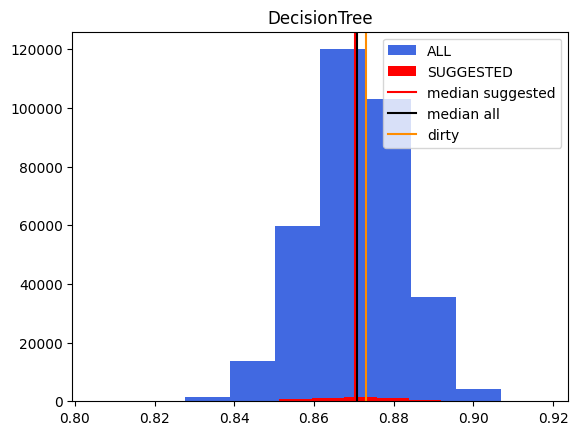

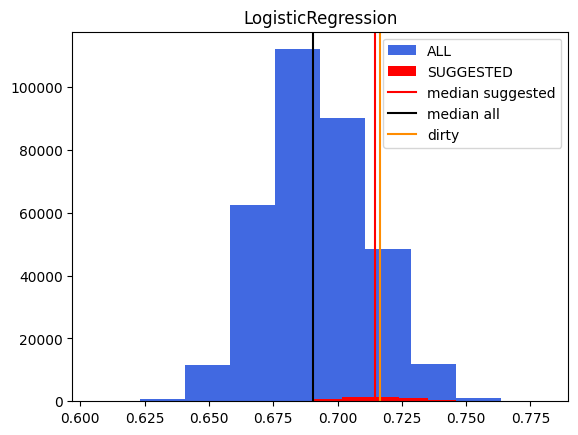

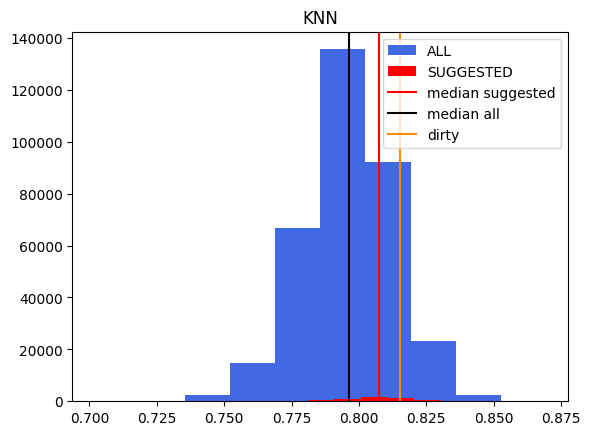

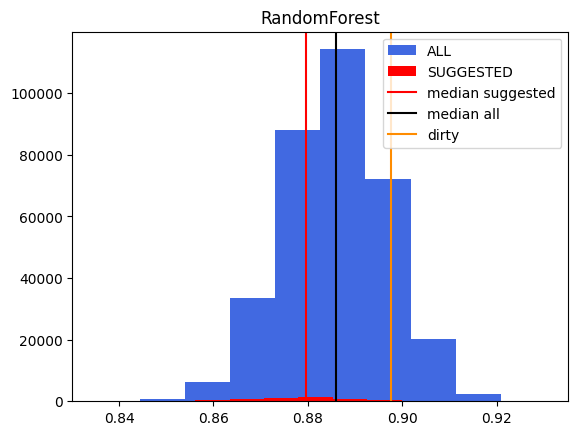

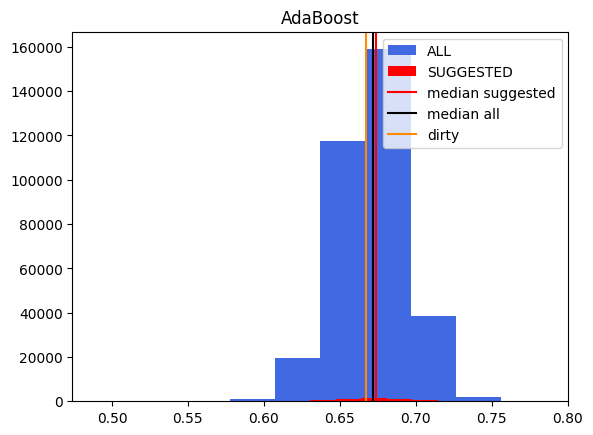

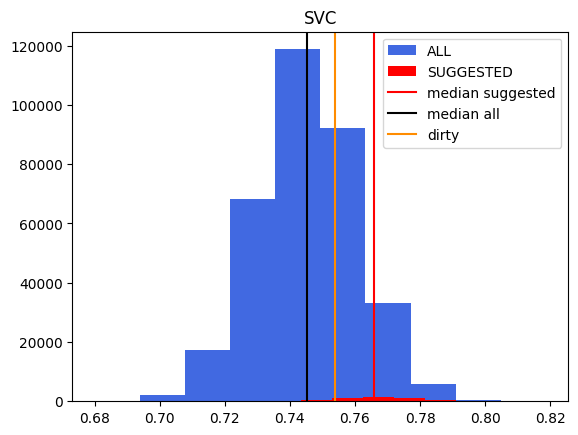

In [5]:
for algorithm in models:

    sample = pd.read_csv('schedule/compiled_sample_schedule.csv')
    suggested = pd.read_csv('schedule/compiled_suggested_schedule.csv')

    suggested = suggested[suggested.algorithm == algorithm]
    sample = sample[['dimension_1', 'dimension_2', 'imp_1', 'imp_2', 'imp_3', 'imp_4',
           'imp_5', 'imp_6', 'imp_7', 'od_1', 'od_2', 'od_3', 'od_4', 'od_5',
           'od_6', 'od_7', 'imp_col_1', 'imp_col_2', 'imp_col_3', 'imp_col_4',
           'imp_col_5', 'imp_col_6', 'imp_col_7', algorithm + '_dirty', algorithm + '_1', algorithm + '_2']]

    original_perf = {
            'DecisionTree': 0.8730314885952215,
            'LogisticRegression': 0.7166503552028867,
            'KNN': 0.81529491393676,
            'RandomForest': 0.8975431406130385,
            'AdaBoost': 0.6669934606506549,
            'SVC': 0.7537471482401658
        }

    x = [sample[algorithm + '_1']]
    y = [suggested.perf_1]

    plt.title(algorithm)

    plt.hist(x, label='ALL', color='royalblue')
    plt.hist(y, label='SUGGESTED', color='red')

    plt.axvline(x=np.median(y), color='red', label='median suggested')
    plt.axvline(x=np.median(x), color='black', label='median all')

    #plt.axvline(x=np.percentile(y, 25), color='red', label='1Q suggested', linestyle='dashed')
    #plt.axvline(x=np.percentile(x, 25), color='black', label='1Q all', linestyle='dashed')

    #plt.axvline(x=np.percentile(y, 75), color='red', label='3Q suggested', linestyle='dashed')
    #plt.axvline(x=np.percentile(x, 75), color='black', label='3Q all', linestyle='dashed')

    plt.axvline(x=original_perf[algorithm], color='darkorange', label='dirty')

    plt.legend(loc='upper right')

    plt.savefig("/Users/camillasancricca/Desktop/" + algorithm + "1.png", bbox_inches='tight')
    plt.show()

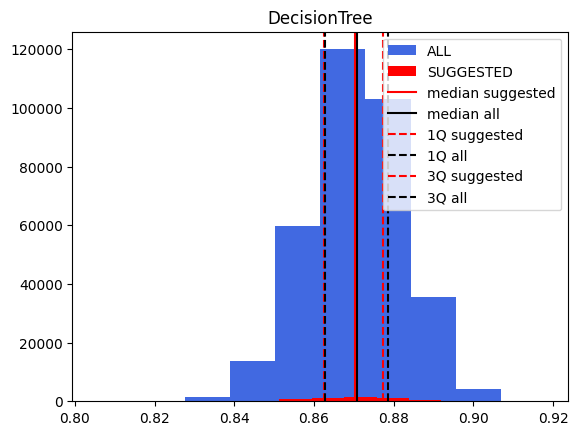

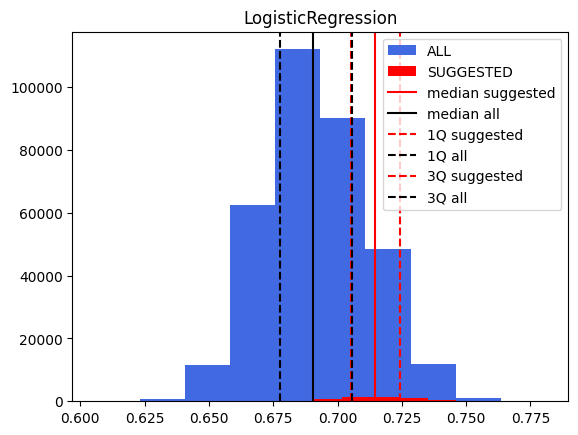

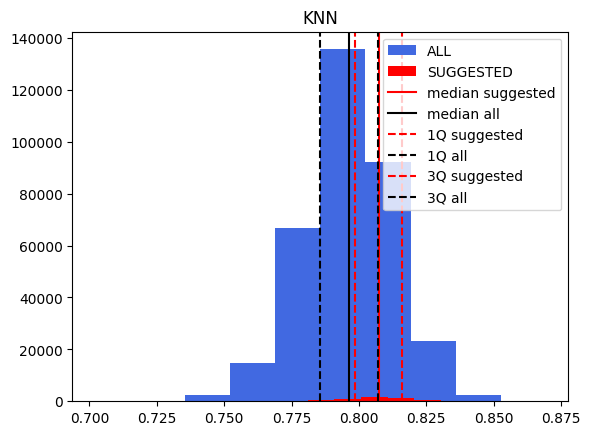

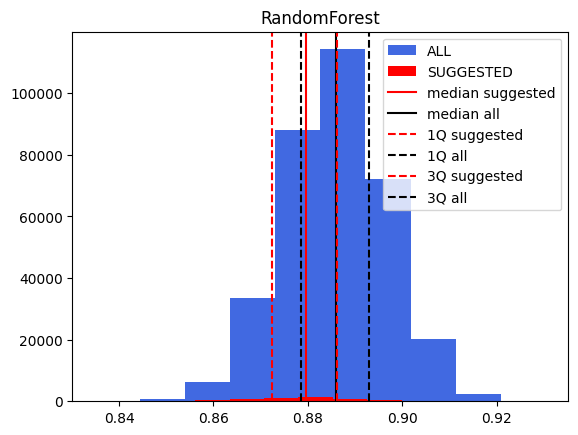

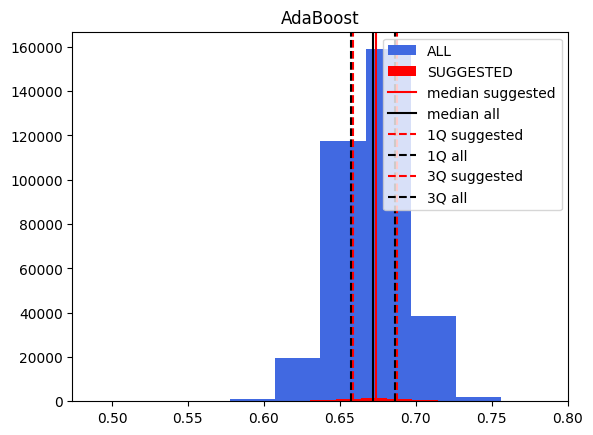

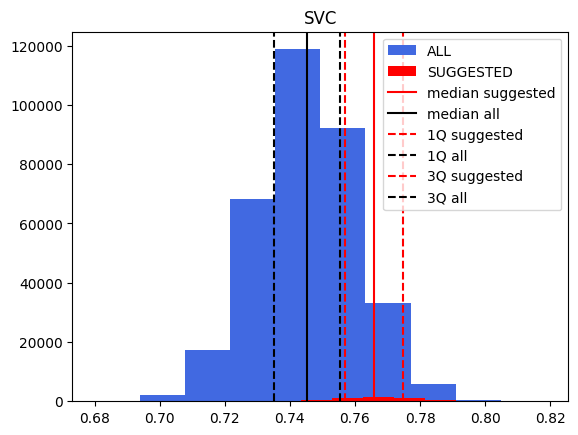

In [6]:
for algorithm in models:

    sample = pd.read_csv('schedule/compiled_sample_schedule.csv')
    suggested = pd.read_csv('schedule/compiled_suggested_schedule.csv')

    suggested = suggested[suggested.algorithm == algorithm]
    sample = sample[['dimension_1', 'dimension_2', 'imp_1', 'imp_2', 'imp_3', 'imp_4',
           'imp_5', 'imp_6', 'imp_7', 'od_1', 'od_2', 'od_3', 'od_4', 'od_5',
           'od_6', 'od_7', 'imp_col_1', 'imp_col_2', 'imp_col_3', 'imp_col_4',
           'imp_col_5', 'imp_col_6', 'imp_col_7', algorithm + '_dirty', algorithm + '_1', algorithm + '_2']]

    original_perf = {
            'DecisionTree': 0.8730314885952215,
            'LogisticRegression': 0.7166503552028867,
            'KNN': 0.81529491393676,
            'RandomForest': 0.8975431406130385,
            'AdaBoost': 0.6669934606506549,
            'SVC': 0.7537471482401658
        }

    x = [sample[algorithm + '_1']]
    y = [suggested.perf_1]

    plt.title(algorithm)

    plt.hist(x, label='ALL', color='royalblue')
    plt.hist(y, label='SUGGESTED', color='red')

    plt.axvline(x=np.median(y), color='red', label='median suggested')
    plt.axvline(x=np.median(x), color='black', label='median all')

    plt.axvline(x=np.percentile(y, 25), color='red', label='1Q suggested', linestyle='dashed')
    plt.axvline(x=np.percentile(x, 25), color='black', label='1Q all', linestyle='dashed')

    plt.axvline(x=np.percentile(y, 75), color='red', label='3Q suggested', linestyle='dashed')
    plt.axvline(x=np.percentile(x, 75), color='black', label='3Q all', linestyle='dashed')

    #plt.axvline(x=original_perf[algorithm], color='darkorange', label='dirty')

    plt.legend(loc='upper right')
    plt.savefig("/Users/camillasancricca/Desktop/" + algorithm + "2.png", bbox_inches='tight')
    plt.show()
